percentage of each highest coronal line ionization energy in the dataset for nonmasers:
[361.0, 99.0, 97.11, 235.04, 99.0, 235.04, 235.04, 99.0, 99.0, 235.04, 235.04, 235.04, 235.04, 99.0, 235.04, 235.04, 99.0, 235.04, 235.04, 262.1, 235.04, 99.0, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 235.04, 99.0, 262.1]


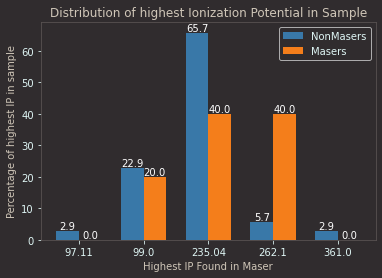

In [49]:
import pandas as pd

N_cl_path = "./data/NonMasers_In_Class_Coronal_Lines_rudmingb.csv"
M_cl_pat = "./data/Masers_In_Class_Coronal_Lines_rudmingb.csv"

# Open NonMasers_In_Class_Coronal_Lines_rudmingb.csv as a DataFrame
df_N_cl = pd.read_csv(N_cl_path)

# Open Masers_In_Class_Coronal_Lines_rudmingb.csv as a DataFrame
df_M_cl = pd.read_csv(M_cl_pat)

# Columns ending with "_LOGL" that need to be replaced
columns_to_replace = [col for col in df_N_cl.columns if col.endswith('_LOGL')]

# Replace -999999 or -999999.00000 with 0 in NonMasers_In_Class_Coronal_Lines_rudmingb.csv
df_N_cl[columns_to_replace] = df_N_cl[columns_to_replace].replace([-999999, -999999.00000], 0)

# Replace -999999 or -999999.00000 with 0 in Masers_In_Class_Coronal_Lines_rudmingb.csv
df_M_cl[columns_to_replace] = df_M_cl[columns_to_replace].replace([-999999, -999999.00000], 0)


# Find columns ending with "_LOGL" in df_N_cl
matching_columns_N_cl = [col for col in df_N_cl.columns if col.endswith("_LOGL")]

# Find columns ending with "_LOGL" in df_M_cl
matching_columns_M_cl = [col for col in df_M_cl.columns if col.endswith("_LOGL")]

# Coronal line IP dictionary
IPs = {'FEXI_7892_LOGL': 262.10 ,
 'SXII_7609_LOGL': 504.78 ,
 'FEX_6374_LOGL': 235.04 ,
 'FEVII_6087_LOGL': 99.00 ,
 'FEVII_5720_LOGL': 99.00 ,
 'ARX_5533_LOGL': 422.60 ,
 'FEVI_5335_LOGL': 75.00 ,
 'CAV_5309_LOGL': 67.10 ,
 'FEXIV_5303_LOGL': 361.00 ,
 'FEVII_5276_LOGL': 99.00 ,
 'FEVI_5176_LOGL': 75.00 ,
 'FEVII_5159_LOGL': 99.00 ,
 'FEVI_5146_LOGL': 75.00 ,
 'FEVII_4893_LOGL': 99.00 ,
 'FEV_4181_LOGL': 54.80 ,
 'FEV_3891_LOGL': 54.80 ,
 'FEV_3839_LOGL': 54.80 ,
 'FEVII_3759_LOGL': 99.00 ,
 'NEV_3426_LOGL': 97.11 ,
 'NEV_3346_LOGL': 97.11 }

import numpy as np
import matplotlib.pyplot as plt

def show_IP_frequency(non_masers, masers):
    # Calculate the frequency of each number in non_masers and masers
    non_masers_freq = np.unique(non_masers, return_counts=True)
    masers_freq = np.unique(masers, return_counts=True)

    non_masers_values = [str(freq) for freq in non_masers_freq[0]]
    non_masers_counts = non_masers_freq[1]
    masers_values = [str(freq) for freq in masers_freq[0]]
    masers_counts = masers_freq[1]

    unified_masers_values = non_masers_values
    unified_masers_counts = np.copy(non_masers_counts)
    for i, nm_val in enumerate(non_masers_values):
        count = 0
        if nm_val in masers_values:
            count = masers_counts[masers_values.index(nm_val)]
        unified_masers_counts[i] = count

    # Customize the plot appearance
    fig = plt.figure()
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax = fig.add_subplot(111)
    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom','top','left','right']:
        ax.spines[pos].set_color('#5a5353')
    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish

    ax.set_title("Distribution of highest Ionization Potential in Sample", color='#cfc6b8')
    ax.set_xlabel("Highest IP Found in Maser", color='#cfc6b8')
    ax.set_ylabel("Percentage of highest IP in sample", color='#cfc6b8')

    # Bar colors and labels
    bar_colors = ['#3978a8', '#f47e1b']
    bar_labels = ['NonMasers', 'Masers']

    # Calculate the positions of the bars on the x-axis
    bar_width = 0.35  # Width of each bar
    non_masers_positions = np.arange(len(non_masers_values))
    masers_positions = non_masers_positions + bar_width

    # Plot the bars for non_masers
    plt.bar(non_masers_positions, (non_masers_counts / len(non_masers)) * 100, width=bar_width,
            color=bar_colors[0], label=bar_labels[0])

    # Plot the bars for masers
    plt.bar(masers_positions, (unified_masers_counts / len(masers)) * 100, width=bar_width,
            color=bar_colors[1], label=bar_labels[1])

    # Set the x-axis tick positions and labels
    tick_positions = non_masers_positions + bar_width / 2
    plt.xticks(tick_positions, non_masers_values, color='#dff6f5')

    # Add the actual values above each bar
    for i, count in enumerate(non_masers_counts):
        plt.text(non_masers_positions[i], (count / len(non_masers)) * 100, str(round((count / len(non_masers) * 100), 1)),
                 ha='center', va='bottom', color='white')

    for i, count in enumerate(unified_masers_counts):
        plt.text(masers_positions[i], (count / len(masers)) * 100, str(round((count / len(masers)) * 100, 1)),
                 ha='center', va='bottom', color='white')

    # Add a legend with custom colors
    legend = plt.legend()
    legend.get_frame().set_facecolor('#302c2e')  # Set legend background color to blackish
    for text in legend.get_texts():
        text.set_color('#dff6f5')  # Set legend text color to whiteish

    # Show the plot
    plt.show()



print("percentage of each highest coronal line ionization energy in the dataset for nonmasers:")
highest_N_IPs = []
for index, row in df_N_cl.iterrows():
    # Initialize highest IP count to 0 for the current row
    highest_IP_count = 0
    for column_key, column_value in row.items():
        if column_key in IPs:
            if IPs[column_key] > highest_IP_count and column_value > 0:
                highest_IP_count = IPs[column_key]
    # Append the highest IP count for the current row to the list
    highest_N_IPs.append(highest_IP_count)

highest_M_IPs = []
for index, row in df_M_cl.iterrows():
    # Initialize highest IP count to 0 for the current row
    highest_IP_count = 0
    for column_key, column_value in row.items():
        if column_key in IPs:
            if IPs[column_key] > highest_IP_count and column_value > 0:
                highest_IP_count = IPs[column_key]
    # Append the highest IP count for the current row to the list
    highest_M_IPs.append(highest_IP_count)

print(highest_N_IPs)
show_IP_frequency(highest_N_IPs, highest_M_IPs)



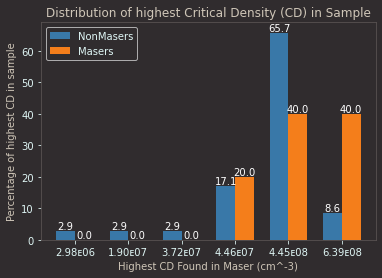

In [60]:
CDs = {'FEXI_7892_LOGL': 6.39E8 ,
 'SXII_7609_LOGL': 7.09E9 ,
 'FEX_6374_LOGL': 4.45E8 ,
 'FEVII_6087_LOGL': 4.46E7 ,
 'FEVII_5720_LOGL': 3.72E7 ,
 'ARX_5533_LOGL': 2.36E9 ,
 'FEVI_5335_LOGL': 6.32E6 ,
 'CAV_5309_LOGL': 6.63E7 ,
 'FEXIV_5303_LOGL': 3.99E8 ,
 'FEVII_5276_LOGL': 2.98E6 ,
 'FEVI_5176_LOGL': 3.29E7 ,
 'FEVII_5159_LOGL': 3.44E6 ,
 'FEVI_5146_LOGL': 2.29E7 ,
 'FEVII_4893_LOGL': 3.09E6 ,
 'FEV_4181_LOGL': 1.86E8 ,
 'FEV_3891_LOGL': 1.61E8 ,
 'FEV_3839_LOGL': 1.00E8 ,
 'FEVII_3759_LOGL': 4.02E7 ,
 'NEV_3426_LOGL': 1.90E7 ,
 'NEV_3346_LOGL': 1.14E7 }



def show_CD_frequency(non_masers, masers):
    # Calculate the frequency of each number in non_masers and masers
    non_masers_freq = np.unique(non_masers, return_counts=True)
    masers_freq = np.unique(masers, return_counts=True)

    non_masers_values = ["{:.2E}".format(freq).replace('E', 'ᴇ').replace('+','') for freq in non_masers_freq[0]]
    non_masers_counts = non_masers_freq[1]
    masers_values = ["{:.2E}".format(freq).replace('E', 'ᴇ').replace('+','') for freq in masers_freq[0]]
    masers_counts = masers_freq[1]

    unified_masers_values = non_masers_values
    unified_masers_counts = np.copy(non_masers_counts)
    for i, nm_val in enumerate(non_masers_values):
        count = 0
        if nm_val in masers_values:
            count = masers_counts[masers_values.index(nm_val)]
        unified_masers_counts[i] = count

    # Customize the plot appearance
    fig = plt.figure()
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax = fig.add_subplot(111)
    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom','top','left','right']:
        ax.spines[pos].set_color('#5a5353')
    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish

    ax.set_title("Distribution of highest Critical Density (CD) in Sample", color='#cfc6b8')
    ax.set_xlabel("Highest CD Found in Maser (cm^-3)", color='#cfc6b8')
    ax.set_ylabel("Percentage of highest CD in sample", color='#cfc6b8')

    # Bar colors and labels
    bar_colors = ['#3978a8', '#f47e1b']
    bar_labels = ['NonMasers', 'Masers']

    # Calculate the positions of the bars on the x-axis
    bar_width = 0.35  # Width of each bar
    non_masers_positions = np.arange(len(non_masers_values))
    masers_positions = non_masers_positions + bar_width

    # Plot the bars for non_masers
    plt.bar(non_masers_positions, (non_masers_counts / len(non_masers)) * 100, width=bar_width,
            color=bar_colors[0], label=bar_labels[0])

    # Plot the bars for masers
    plt.bar(masers_positions, (unified_masers_counts / len(masers)) * 100, width=bar_width,
            color=bar_colors[1], label=bar_labels[1])

    # Set the x-axis tick positions and labels
    tick_positions = non_masers_positions + bar_width / 2
    plt.xticks(tick_positions, non_masers_values, color='#dff6f5')

    # Add the actual values above each bar
    for i, count in enumerate(non_masers_counts):
        plt.text(non_masers_positions[i], (count / len(non_masers)) * 100, str(round((count / len(non_masers) * 100), 1)),
                 ha='center', va='bottom', color='white')

    for i, count in enumerate(unified_masers_counts):
        plt.text(masers_positions[i], (count / len(masers)) * 100, str(round((count / len(masers)) * 100, 1)),
                 ha='center', va='bottom', color='white')

    # Add a legend with custom colors
    legend = plt.legend()
    legend.get_frame().set_facecolor('#302c2e')  # Set legend background color to blackish
    for text in legend.get_texts():
        text.set_color('#dff6f5')  # Set legend text color to whiteish

    # Show the plot
    plt.show()




highest_N_CDs = []
for index, row in df_N_cl.iterrows():
    # Initialize highest CD count to 0 for the current row
    highest_CD_count = 0
    for column_key, column_value in row.items():
        if column_key in CDs:
            if CDs[column_key] > highest_CD_count and column_value > 0:
                highest_CD_count = CDs[column_key]
    # Append the highest CD count for the current row to the list
    highest_N_CDs.append(highest_CD_count)

highest_M_CDs = []
for index, row in df_M_cl.iterrows():
    # Initialize highest CD count to 0 for the current row
    highest_CD_count = 0
    for column_key, column_value in row.items():
        if column_key in CDs:
            if CDs[column_key] > highest_CD_count and column_value > 0:
                highest_CD_count = CDs[column_key]
    # Append the highest CD count for the current row to the list
    highest_M_CDs.append(highest_CD_count)

show_CD_frequency(highest_N_CDs, highest_M_CDs)